In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')




## Importing Data Sets

In [2]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [3]:
pd.options.display.max_columns = None
test_potentialfraud

Provider
0     PRV51002
1     PRV51006
2     PRV51009
3     PRV51010
4     PRV51018
...        ...
1348  PRV57713
1349  PRV57726
1350  PRV57745
1351  PRV57749
1352  PRV57750

[1353 rows x 1 columns]

## Warmup Question 1:

- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.
- How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [4]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))


In [5]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1        BENE11001   CLM66048   2009-08-31  2009-09-02  PRV55907   
2        BENE11001   CLM68358   2009-09-17  2009-09-20  PRV56046   
3        BENE11011   CLM38412   2009-02-14  2009-02-22  PRV52405   
4        BENE11014   CLM63689   2009-08-13  2009-08-30  PRV56614   
...            ...        ...          ...         ...       ...   
517732  BENE159198  CLM510792   2009-08-06  2009-08-06  PRV53699   
517733  BENE159198  CLM551294   2009-08-29  2009-08-29  PRV53702   
517734  BENE159198  CLM596444   2009-09-24  2009-09-24  PRV53676   
517735  BENE159198  CLM636992   2009-10-18  2009-10-18  PRV53689   
517736  BENE159198  CLM686139   2009-11-17  2009-11-18  PRV53689   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                        26000          PHY390922                NaN   
1                         5000          PHY318495          PHY318495   
2                         5000          PHY372395                NaN   
3                         5000          PHY369659          PHY392961   
4                        10000          PHY379376          PHY398258   
...                        ...                ...                ...   
517732                     800          PHY364188          PHY364188   
517733                     400          PHY423019          PHY332284   
517734                      60          PHY361063                NaN   
517735                      70          PHY403198                NaN   
517736                      80          PHY419379                NaN   

       OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0                 NaN  2009-04-12                  7866             1068.0   
1                 NaN  2009-08-31                  6186             1068.0   
2           PHY324689  2009-09-17                 29590             1068.0   
3           PHY349768  2009-02-14                   431             1068.0   
4                 NaN  2009-08-13                 78321             1068.0   
...               ...         ...                   ...                ...   
517732      PHY385752         NaN                   NaN                0.0   
517733            NaN         NaN                   NaN                0.0   
517734            NaN         NaN                   NaN                0.0   
517735      PHY419379         NaN                   NaN                0.0   
517736      PHY419379         NaN                   NaN                0.0   

       DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0       2009-04-18                201               1970               4019   
1       2009-09-02                750               6186               2948   
2       2009-09-20                883              29623              30390   
3       2009-02-22                067              43491               2762   
4       2009-08-30                975                042               3051   
...            ...                ...                ...                ...   
517732         NaN                NaN               2163              V4575   
517733         NaN                NaN              07041               5781   
517734         NaN                NaN               V570              78079   
517735         NaN                NaN                NaN                NaN   
517736         NaN                NaN              78900              78609   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                    5853               7843               2768   
1                   56400                NaN                NaN   
2                   71690              34590              V1581   
3                    7843              32723              V1041   
4                   34400               5856              42732   
...                   ...                .

In [6]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [7]:
full_data= pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

In [8]:
full_data

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1        BENE11001   CLM66048   2009-08-31  2009-09-02  PRV55907   
2        BENE11001   CLM68358   2009-09-17  2009-09-20  PRV56046   
3        BENE11011   CLM38412   2009-02-14  2009-02-22  PRV52405   
4        BENE11014   CLM63689   2009-08-13  2009-08-30  PRV56614   
...            ...        ...          ...         ...       ...   
558206  BENE159198  CLM510792   2009-08-06  2009-08-06  PRV53699   
558207  BENE159198  CLM551294   2009-08-29  2009-08-29  PRV53702   
558208  BENE159198  CLM596444   2009-09-24  2009-09-24  PRV53676   
558209  BENE159198  CLM636992   2009-10-18  2009-10-18  PRV53689   
558210  BENE159198  CLM686139   2009-11-17  2009-11-18  PRV53689   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                        26000          PHY390922                NaN   
1                         5000          PHY318495          PHY318495   
2                         5000          PHY372395                NaN   
3                         5000          PHY369659          PHY392961   
4                        10000          PHY379376          PHY398258   
...                        ...                ...                ...   
558206                     800          PHY364188          PHY364188   
558207                     400          PHY423019          PHY332284   
558208                      60          PHY361063                NaN   
558209                      70          PHY403198                NaN   
558210                      80          PHY419379                NaN   

       OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0                 NaN  2009-04-12                  7866             1068.0   
1                 NaN  2009-08-31                  6186             1068.0   
2           PHY324689  2009-09-17                 29590             1068.0   
3           PHY349768  2009-02-14                   431             1068.0   
4                 NaN  2009-08-13                 78321             1068.0   
...               ...         ...                   ...                ...   
558206      PHY385752         NaN                   NaN                0.0   
558207            NaN         NaN                   NaN                0.0   
558208            NaN         NaN                   NaN                0.0   
558209      PHY419379         NaN                   NaN                0.0   
558210      PHY419379         NaN                   NaN                0.0   

       DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0       2009-04-18                201               1970               4019   
1       2009-09-02                750               6186               2948   
2       2009-09-20                883              29623              30390   
3       2009-02-22                067              43491               2762   
4       2009-08-30                975                042               3051   
...            ...                ...                ...                ...   
558206         NaN                NaN               2163              V4575   
558207         NaN                NaN              07041               5781   
558208         NaN                NaN               V570              78079   
558209         NaN                NaN                NaN                NaN   
558210         NaN                NaN              78900              78609   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                    5853               7843               2768   
1                   56400                NaN                NaN   
2                   71690              34590              V1581   
3                    7843              32723              V1041   
4                   34400               5856              42732   
...                   ...                .

## Providers and Doctors

### How many medical doctors are there in the train outpatient dataset? How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?

- There are 11,605 doctors in the inpatient data and 74,110 doctors in the outpatient data.

In [9]:
print(full_data.loc[full_data.patientType=='inpatient'].AttendingPhysician.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].AttendingPhysician.unique().shape[0])


11605
74110


### Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

- Most doctors have a connection of 1 clinic. 

In [10]:
physician= full_data.groupby(['AttendingPhysician','Provider'])['Provider'].count().\
reset_index(name='NumProvider').groupby(['AttendingPhysician'])['NumProvider'].count().reset_index()

print(physician.NumProvider.value_counts())


1    76844
2     4741
3      382
4       65
5       19
6        9
9        1
8        1
7        1
Name: NumProvider, dtype: int64


In [11]:
phy3 = physician.loc[physician.NumProvider==9]

phy4 = pd.concat([phy3, full_data[['AttendingPhysician', 'Provider']]], axis=1)
phy5 = pd.merge(phy4, train_potentialfraud, on='Provider', how='left')


In [12]:
phy4

AttendingPhysician  NumProvider AttendingPhysician  Provider
0                     NaN          NaN          PHY390922  PRV55912
1                     NaN          NaN          PHY318495  PRV55907
2                     NaN          NaN          PHY372395  PRV56046
3                     NaN          NaN          PHY369659  PRV52405
4                     NaN          NaN          PHY379376  PRV56614
...                   ...          ...                ...       ...
558206                NaN          NaN          PHY364188  PRV53699
558207                NaN          NaN          PHY423019  PRV53702
558208                NaN          NaN          PHY361063  PRV53676
558209                NaN          NaN          PHY403198  PRV53689
558210                NaN          NaN          PHY419379  PRV53689

[558211 rows x 4 columns]

Text(0, 0.5, 'number of doctors per provider')

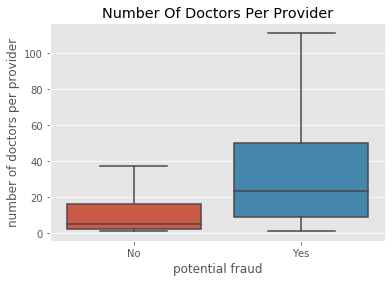

In [13]:
doctors = full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().reset_index(name='NumOfDoctors').\
groupby('Provider')['NumOfDoctors'].count().reset_index()

doctors2 = pd.merge(doctors, train_potentialfraud, on='Provider', how='left')


sns.boxplot(x='PotentialFraud', y='NumOfDoctors', data=doctors2, showfliers=False)
plt.title('Number Of Doctors Per Provider')
plt.xlabel('potential fraud')
plt.ylabel('number of doctors per provider')

## Feature Engineering
- add number of doctors

In [14]:
doctors= full_data.groupby(['Provider', 'AttendingPhysician'])['AttendingPhysician'].count().\
reset_index(name='NumOfDoctors').groupby('Provider')['NumOfDoctors'].count().reset_index()

trainProvider = pd.merge(train_potentialfraud, doctors, on='Provider')
trainProvider.sample(2)

Provider PotentialFraud  NumOfDoctors
4990  PRV57253             No             4
4609  PRV56764             No            41

## Providers and Patients

### How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- There are 31,289 inpatient patients and 133,980 outpatient patients

In [15]:
print(full_data.loc[full_data.patientType=='inpatient'].BeneID.unique().shape[0])
print(full_data.loc[full_data.patientType=='outpatient'].BeneID.unique().shape[0])


31289
133980


### Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?¶
We can characterize these patients by the number of providers they have. We can generate a new feature providers per patient.

In [16]:
patient= full_data.groupby(['BeneID', 'Provider', 'PotentialFraud'])['BeneID'].count().reset_index(name='NumProvider').\
groupby(['BeneID', 'PotentialFraud'])['NumProvider'].count().reset_index()


Text(0.5, 1.0, 'Proportion of Providers Per Patient')

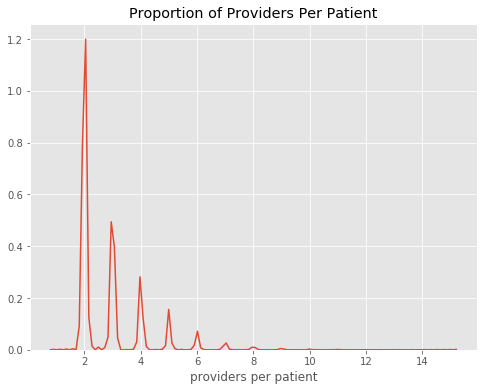

In [17]:


plt.subplots(figsize=(8,6))
sns.distplot(patient['NumProvider'], hist=False)
plt.xlabel('providers per patient')
plt.title('Proportion of Providers Per Patient')

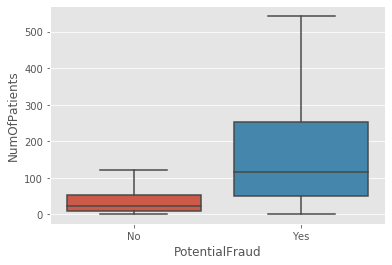

In [18]:
patients = full_data.groupby(['Provider', 'BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

provider_patient= pd.merge(patients, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='NumOfPatients', data=provider_patient, showfliers=False)


## Feature Engineering
- add number of patients

In [19]:
patient= full_data.groupby(['Provider','BeneID'])['BeneID'].count().reset_index(name='NumOfPatients').\
groupby('Provider')['NumOfPatients'].count().reset_index()

trainProvider2 = pd.merge(trainProvider, patient, on='Provider')
trainProvider2.sample(2)

Provider PotentialFraud  NumOfDoctors  NumOfPatients
1143  PRV52425             No             3              8
1609  PRV53004             No            10             16

## How  does providers' number of doctors and patients help detect fraud?

Text(0, 0.5, 'number of patients')

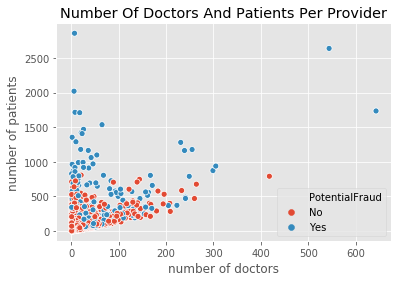

## Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients

Text(0.5, 0, 'type of patient')

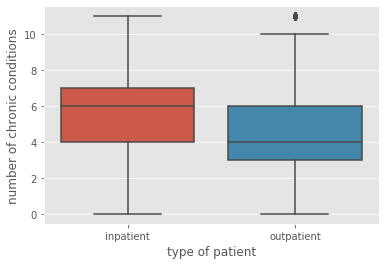

In [21]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronicCond = pd.concat([patientChronic,full_data[['patientType', 'BeneID', 'ClaimID', 'PotentialFraud']]], axis =1)

sns.boxplot(x='patientType', y='NumChronicCond',  data=chronicCond)
plt.ylabel('number of chronic conditions')
plt.xlabel('type of patient')
                       

##  Do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.




In [160]:
patientChronic = full_data.filter(regex='Chronic').replace(to_replace=2, value=0).sum(axis=1).\
reset_index(name='NumChronicCond')

chronic = pd.concat([patientChronic, full_data[['Provider', 'ClaimID']]], axis=1)

a= chronic.groupby(['Provider', 'NumChronicCond'])['ClaimID'].count().reset_index(name='TotClaims').\
groupby('Provider')[['NumChronicCond', 'TotClaims']].mean().reset_index()

b = pd.merge(a, train_potentialfraud, on='Provider', how='left')


b_no = b.loc[b.PotentialFraud=='No']
b_yes= b.loc[b.PotentialFraud=='Yes']




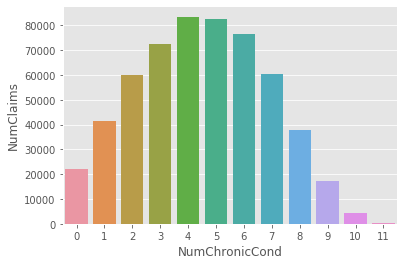

In [133]:

chronic2 = chronic.groupby(['NumChronicCond'])['ClaimID'].count().reset_index(name='NumClaims')
sns.barplot(x='NumChronicCond', y='NumClaims', data=chronic2)

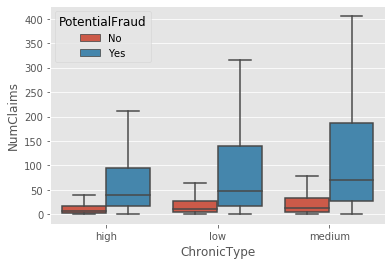

In [158]:
def getChronicGroup(x):
    if x <4:
        return('low')
    elif (x >= 4)& (x< 7):
        return('medium')
    else:
        return('high')


chronic['ChronicType'] = chronic['NumChronicCond'].apply(getChronicGroup )

x= chronic.groupby(['Provider', 'ChronicType'])['ClaimID'].count().reset_index(name='NumClaims')

y = pd.merge(x, train_potentialfraud, on='Provider', how='left')


sns.boxplot(x='ChronicType', y='NumClaims',data = y, hue='PotentialFraud', showfliers=False)

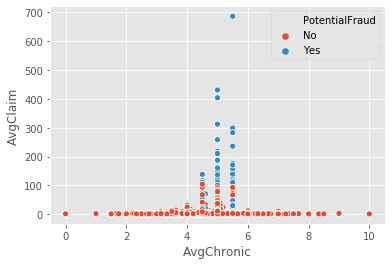

In [169]:
m = chronic.groupby(['Provider', 'NumChronicCond'])['ClaimID'].count().reset_index(name='NumClaims').\
groupby('Provider').agg({'NumChronicCond':'mean', 'NumClaims':'mean'}).reset_index().\
rename(columns={'NumChronicCond':'AvgChronic', 'NumClaims':'AvgClaim'})

m= pd.merge(m, train_potentialfraud, on='Provider', how='left')

sns.scatterplot(x='AvgChronic', y='AvgClaim', data=m, hue='PotentialFraud')

## Do the same providers provide both inpatient and outpatient services? Summarize your finding.

- There are 1694 providers that offer both services
- There are 398 providers that offer inpatient services only
- There are 3318 providers thar offer outpatient services only

In [26]:
a = full_data.groupby(['Provider', 'patientType'])['BeneID'].count().reset_index(name='count').\
drop('count', axis=1)

a_list= list(zip(a.Provider, a.patientType))

providerDict= {}

for ele in a_list:
    if ele[0] not in providerDict:
        providerDict[ele[0]]= ele[1]    
    else:
        providerDict[ele[0]] = 'both'
        

providerService = pd.DataFrame(providerDict.keys(), providerDict.values()).reset_index().\
rename(columns={'index':'ServiceType', 0:'Provider'})


In [27]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')


serviceFraud.groupby('ServiceType')['Provider'].count()

ServiceType
both          1694
inpatient      398
outpatient    3318
Name: Provider, dtype: int64

## Providers that offer only outpatient service have a low chance of commiting fraud. While providers that offer both services have a greater chance of commiting healthcare fraud.

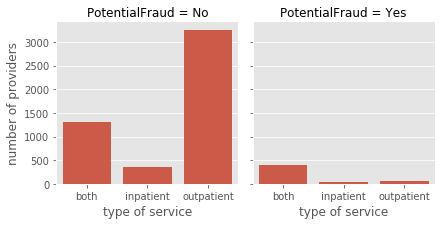

In [28]:
serviceFraud = pd.merge(train_potentialfraud, providerService, on='Provider')

service = serviceFraud.groupby(['ServiceType', 'PotentialFraud'])['Provider'].count().reset_index(name='count')


g = sns.FacetGrid(service, col="PotentialFraud")
g.map_dataframe(sns.barplot, x="ServiceType", y="count")
g.set_axis_labels("type of service", "number of providers")


## Feature Engineering
- add type of service
- add number of claims


In [29]:
trainProvider3 = pd.merge(trainProvider2, providerService, on='Provider')
trainProvider3.sample(2)

Provider PotentialFraud  NumOfDoctors  NumOfPatients ServiceType
3352  PRV55202             No            12             27  outpatient
1884  PRV53354             No             3             18  outpatient

In [ ]:
full_data.groupby(['Provi'])

In [41]:
claims= full_data.groupby(['Provider', 'ClaimID'])['ClaimID'].count().\
reset_index(name='NumOfClms').groupby('Provider')['NumOfClms'].count().reset_index()

trainProvider4 = pd.merge(trainProvider3, claims, on='Provider')
trainProvider4.sample(10)




Provider PotentialFraud  NumOfDoctors  NumOfPatients ServiceType  \
3425  PRV55293             No             2             25  outpatient   
4283  PRV56354             No             7              9        both   
4118  PRV56152             No             9             15  outpatient   
1824  PRV53276             No             7            131  outpatient   
3586  PRV55497             No             7              7  outpatient   
326   PRV51416             No             1             79  outpatient   
3327  PRV55172            Yes            40             98        both   
3209  PRV55026             No           124            239  outpatient   
816   PRV52014             No           113            299  outpatient   
89    PRV51118             No             4             16   inpatient   

      NumOfClms  
3425         33  
4283         11  
4118         18  
1824        291  
3586          7  
326          81  
3327        114  
3209        272  
816         351  
89           16

## Warmup Question 3, Time Series Analysis:
- Based on the attribute **ClaimStartDt**, analyze the weekly service volume variations.
- What are the weekly patterns (weekly seasonalities) you observe for the demands on **inpatient** or **outpatient**
services?
- Identify the top $5$ most frequent **ClmAdmitDiagnosisCodes** and trace their weekly seasonalities.
Display the patterns you find.
- For the inpatient patients, is there any pattern between the durations of the treatments and
the patient attributes?
- For the monthly inpatient/outpatient claim counts of all the providers, please analyze the
table of provider-month matrices and report any interesting findings.

- **hint**: dataframe's pivot_table method could be used to construct the provider-month matrix.

### Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

In [96]:
full_data['ClaimStartDt'] = pd.to_datetime(full_data['ClaimStartDt'])
full_data['ClaimStartWeek']= full_data['ClaimStartDt'].dt.week


In [32]:
weeklyClaims= full_data.groupby(['Provider','startClaimWeek', 'ClaimID'])['ClaimID'].count().reset_index(name='WeeklyClaims').\
groupby(['Provider', 'startClaimWeek'])['WeeklyClaims'].count().reset_index()


In [35]:
weeklyClaims

Provider  startClaimWeek  WeeklyClaims
0       PRV51001               1             1
1       PRV51001               5             1
2       PRV51001               6             4
3       PRV51001              12             1
4       PRV51001              13             2
...          ...             ...           ...
139414  PRV57763              48             3
139415  PRV57763              49             1
139416  PRV57763              50             1
139417  PRV57763              51             2
139418  PRV57763              52             2

[139419 rows x 3 columns]

### The number of claims start to peak at week 5 and starts to go down at week 30. There is a significant drop at week 50.

Text(0, 0.5, 'total claims')

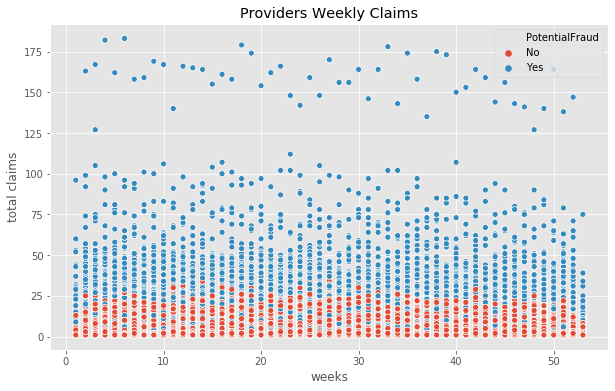

In [115]:
weeklyClaim = full_data.groupby([ 'startClaimWeek', 'Provider'])['ClaimID'].count().reset_index(name='NumClaims')


weeklyClaim2 = pd.merge(weeklyClaim, train_potentialfraud, on='Provider', how='left')
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='startClaimWeek', y='NumClaims', data=weeklyClaim2, hue='PotentialFraud')
plt.title('Providers Weekly Claims')
plt.xlabel('weeks')
plt.ylabel('total claims')


## Feature engineering
- add weekly claims and startClaimWeek


In [ ]:
# trainProvider5= pd.merge(trainProvider4, weeklyClaims, on='Provider', how='left')

# trainProvider5.WeeklyClaims.value_counts()

In [ ]:
trainProvider5.sample(15)

### Duration of the treatments

In [ ]:
full_data['ClaimEndDt'] = pd.to_datetime(full_data['ClaimEndDt'])
full_data['Duration'] = full_data['ClaimEndDt'].sub(full_data['ClaimStartDt'], axis=0)/np.timedelta64(1,'D') + 1

duration = full_data.groupby(['Provider'])['Duration'].mean().reset_index(name='AvgDurationTrtment')

duration2 = pd.merge(duration, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='AvgDurationTrtment', data=duration2, showfliers=False)


## Feature Engineering

- add average duration of treatment per claims

In [ ]:
trainProvider5 = pd.merge(trainProvider4, duration, on='Provider', how='left')
trainProvider5.shape

### For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings.
- hint: dataframe's pivot_table method could be used to construct the provider-month matrix.

In [172]:
full_data['startClaimMonth'] = full_data['ClaimStartDt'].dt.month

monthly = full_data.groupby(['Provider','startClaimMonth', 'ClaimID'])['ClaimID'].count().reset_index(name='MonthlyClaims').\
groupby(['Provider', 'startClaimMonth'])['MonthlyClaims'].count().reset_index()

pd.pivot_table(data=monthly, values='MonthlyClaims', index='Provider', columns=[ 'startClaimMonth']).fillna(0)

startClaimMonth     1      2      3     4     5      6     7     8      9   \
Provider                                                                     
PRV51001           2.0    4.0    3.0   2.0   5.0    3.0   2.0   1.0    1.0   
PRV51003          13.0   16.0   10.0  10.0   8.0   14.0  11.0  13.0    9.0   
PRV51004          12.0   19.0   18.0  10.0   8.0   11.0  14.0  10.0   12.0   
PRV51005         102.0  101.0  113.0  98.0  83.0  103.0  92.0  99.0  107.0   
PRV51007           6.0    5.0    9.0   4.0   9.0    9.0   3.0   6.0    7.0   
...                ...    ...    ...   ...   ...    ...   ...   ...    ...   
PRV57759           6.0    1.0    2.0   2.0   4.0    3.0   3.0   1.0    2.0   
PRV57760           1.0    5.0    1.0   1.0   1.0    3.0   0.0   4.0    3.0   
PRV57761           5.0    6.0    4.0   5.0   8.0   10.0   5.0   5.0    4.0   
PRV57762           0.0    0.0    0.0   0.0   0.0    0.0   0.0   0.0    1.0   
PRV57763           8.0    4.0    8.0   5.0  10.0    8.0  13.0  16.0   18.0   

startClaimMonth     10    11    12  
Provider                            
PRV51001           0.0   0.0   2.0  
PRV51003          11.0  11.0   6.0  
PRV51004          11.0   8.0  16.0  
PRV51005         111.0  73.0  83.0  
PRV51007           2.0   6.0   6.0  
...                ...   ...   ...  
PRV57759           1.0   2.0   1.0  
PRV57760           0.0   2.0   1.0  
PRV57761          14.0  11.0   5.0  
PRV57762           0.0   0.0   0.0  
PRV57763           9.0  13.0   6.0  

[5410 rows x 12 columns]

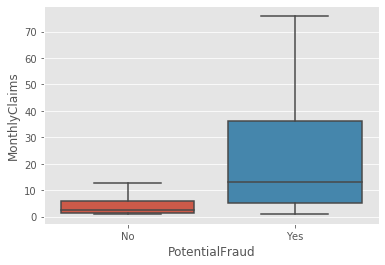

In [180]:
prov = monthly.groupby('Provider')['MonthlyClaims'].mean().reset_index()

prov2= pd.merge(prov, train_potentialfraud, on='Provider', how='left')

sns.boxplot(x='PotentialFraud', y='MonthlyClaims', data=prov2, showfliers=False)

Text(0.5, 1.0, 'Providers Monthly Claims')

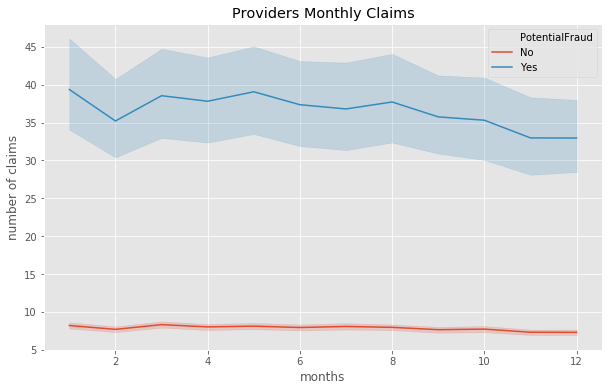

In [123]:
monthly2 = pd.merge(monthly, train_potentialfraud, on='Provider', how='left')

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='startClaimMonth', y='MonthlyClaims', data=monthly2, hue='PotentialFraud')
plt.xlabel('months')
plt.ylabel('number of claims')
plt.title('Providers Monthly Claims')

## Feature Engineering

- add monthly claims

In [ ]:
trainProvider6 = pd.merge(trainProvider5, monthly, on='Provider', how='left')
trainProvider6.shape

## Unsupervised Clustering
- We would like to study the affinity of the providers. We can **embed** the providers into some Euclidean
 space based on several ideas.
  - Base on the monthly claim patterns studied in the above **time series analysis**. 
  - Base on the **bag of words** model applied to the patients' inpatient/outpatient diagnosis codes/procedure codes
    or the patients' pre-existing chronic conditions.
- Because there are so many diagnosis/procedure codes, select the most frequent diagnosis codes as your features.    
- Basically each claim can be viewed as a 'document'. Each diagnosis/procedure code or a pre-existing
condition can be viewed as a 'term'. The idea of **bag-of-word** model allows us to generate
a 'document-term matrix' of word-counts.
- For the patient pre-existing chronic conditions, we may opt to treat multiple visits of the same patients
to the same provider as a single sample.

- Once we have a specified **provider** embedding, we may apply a clustering technique to
analyze the dis-similarities of the providers.
- Start with **kmeans**, **hierarchical clustering**, and extend into other clustering techniques.
- You may decide if you need to normalize the columns if necessary.
- Provide insights on how different providers behave similarly.
- How would you decide if your clustering result would have any relevance to identify **PotentialFraud**?


### Identify the top  5  most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find.

In [ ]:
full_data.ClmAdmitDiagnosisCode.value_counts()[:10].reset_index().rename(columns={})

In [ ]:
code = full_data.groupby(['ClmAdmitDiagnosisCode'])['ClmAdmitDiagnosisCode'].count().reset_index(name='count')

code1 = code.loc[code['count'] > 1200]

code2 = pd.merge(code1, full_data[['PotentialFraud','ClmAdmitDiagnosisCode']], on='ClmAdmitDiagnosisCode', how='left')
a= code2.groupby(['PotentialFraud', 'ClmAdmitDiagnosisCode'])['ClmAdmitDiagnosisCode'].count().reset_index(name='count')

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='ClmAdmitDiagnosisCode', y='count', data=a, hue='PotentialFraud')

## Thecodes with most fraudelent accounts are 42731, 78605 and v7612. There is one code that has more yes than no (78650)

In [ ]:
diagCode = full_data.groupby('ClmAdmitDiagnosisCode')['ClaimID'].count().reset_index(name='count')
diagCode.loc[diagCode['count'] >= 2000]

codes = pd.merge(diagCode, full_data, on='ClmAdmitDiagnosisCode', how='left')
codes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(codes)
# print(X.toarray())

cv = CountVectorizer()



cv.fit(codes['ClmAdmitDiagnosisCode'])

results = cv.transform(codes['ClmAdmitDiagnosisCode'])



features = cv.get_feature_names()
df_res = pd.DataFrame(results.toarray(), columns=features)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.set_params(n_clusters=10)
kmeans.fit(results)

In [ ]:
kmeans.cluster_centers_

### kmeans.labels_

In [ ]:
from PlottingFunctions import plot_inertia, plot_silhouette

plot_silhouette(kmeans, df_res)

###  Code V7612 has the highest number of claims from week 1 up to week 15 and also had the highest drops of claims.
###  Most of the codes shows a decline of claims as the week progresses.

In [ ]:
ax, f = plt.subplots(figsize=(10, 6))
sns.lineplot(data =week_diag, x= 'startClaimWeek', y= 'numClaims', hue='ClmAdmitDiagnosisCode', style='ClmAdmitDiagnosisCode')
plt.title('Weekly Claims Of Top Diagnosis Code')
plt.xlabel('week claim')
plt.ylabel('number of claims')

In [ ]:
trainProvider = pd.merge(trainProvider, duration, on='Provider', how='left')
trainProvider.sample(2)

In [ ]:
clmDiagnosis = inpatient.ClmAdmitDiagnosisCode.value_counts()[:10].reset_index()
clmDiagnosis = pd.DataFrame(clmDiagnosis).rename(columns={'index':'ClmAdmitDiagnosisCode', 'ClmAdmitDiagnosisCode':'count'})
clmDiagnosis

duration = full_data[['ClmAdmitDiagnosisCode', 'duration']].copy()

duration_diag = pd.merge(clmDiagnosis, duration, on='ClmAdmitDiagnosisCode', how='left')


### Patient with diagnosis code V5789 had the highest median duration which is around 15 days.

In [ ]:
ax, f= plt.subplots(figsize=(12, 6))
sns.violinplot(x='ClmAdmitDiagnosisCode', y='duration', data=duration_diag, showfliers=False)
plt.title('Duration Of Treatments Of Top Diagnosis Code')
plt.xlabel('diagnosis code')
plt.ylabel('duration of treatment in days')

### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of
these duplicated records would signal potential fraud activities. 
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify
the duplicated claims in the inpatients_train, outpatients_train data.
- Are these potentially fradulent providers duplicating their own medical records, or are they
using the records from the other providers?
- Assuming that the claimStartDates are authentic, identify the providers which are the information
receivers. Identify the providers which are the information givers.
- Summarize the duplicate record counts/provider and study if the statistics have different
distributions between honest and potentialfraud providers.
- Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these 
fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to
the other types of fraudulent activities.
- Do these duplicated records show any anomaly in terms of geographic locations?
Even though the original data doesn't specify the providers nor the doctors' practice locations,
one may use the majority of the patients' residence state/county information to infer their
physical locations.
- Base on your best knowledge of suspicious activities in duplicating the patient claims, flag
the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

### Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

In [ ]:
dup_claims = full_data.filter(regex='ClmAdmitDiagnosisCode|DiagnosisGroupCode|ClmDiagnosisCode|ClmProcedureCode')
patient_claims = full_data[['ClaimID', 'patientType']]

dup_claims = dup_claims. duplicated(keep=False).reset_index(name='dup')

dup_claims = pd.concat([patient_claims, dup_claims], axis=1).drop('index', axis=1)
dup_claims=dup_claims.loc[dup_claims.dup==True]
dup_claims

### Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [ ]:
provider = full_data[['ClaimID', 'Provider']].copy()

provider_dup = pd.merge(dup_claims, provider, on='ClaimID', how='left')
provider_dup.groupby('Provider')['ClaimID'].count().reset_index(name='numDupClaims')

### Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.

In [ ]:
full_data[['Provider','ClaimStartDt']]

### Market Basket Analysis (Associative Rule Mining)
- Traditionally in supermarkets or e-commerces, it is important to analyze the purchase patterns
    of their customers. For example, the retailers often want to know
     - what are the frequently purchased items?
     - conditioning on the purchasing of some item $A$ (or a set of items), 
    what other items $B$ are likely to be purchased in the same transaction?
- There are several terminologies used in **MBA**, like support, confidence, lift, conviction, which are
filtered based on the most popular **apriori** algorithm.
- **support**: sample probability of a pattern to occur in the dataset.
- **confidence**: the conditional probability of $P(B|A)={P(A,B)\over P{A}}$, where $A$, $B$ are
    two disjoint sets of items.
- **lift**: The measure of event independence $P(A,B)\over P(A)\cdot P(B)$.
- **conviction**: $P(\sim B)\over P(\sim B|A)$, which gauges whether $A\mapsto \sim B$ is purely by chance.
  $\sim B$ is the event that item sets in $B$ are **absent**, with $P(\sim B) = 1-P(B)$.  
- There are multiple python packages which handle **associative rule mining**, pip install 
**apyori** or **mlxtend** to start your **MBA**.
- In the following, we apply the machinery of **MBA** to analyze transaction-like data.

In [ ]:
chronic= full_data.filter(regex='Chronic').replace(to_replace=2, value=0)
chronic.columns = [col.replace('ChronicCond_', '') for col in chronic.columns]

chronic


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
frequent_itemsets = apriori(chronic, min_support=0.07,  use_colnames=True)


In [ ]:
frequent_itemsets.sort_values(by='support', ascending=False)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

In [ ]:
rules2 = rules.loc[(rules.support> 0.2)&(rules.confidence>0.9)].reset_index()

rules2

In [ ]:
import networkx as nx

In [ ]:
plt.figure(figsize=(20,20))
G = nx.from_pandas_edgelist(rules2, 'antecedents', 'consequents', edge_attr=True)
nx.draw(G, pos=nx.spring_layout(G), node_size=300, with_labels=True)
